In [1]:
from yugiquery import *
header('Sets')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Sets - Execution started 11/02/2023 22:50 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch set lists](#Fetch-set-lists)
    *   [1.2  Fetch set properties](#Fetch-set-properties)
    *   [1.3  Merge data](#Merge-data)
    *   [1.4  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Set](#Set)
    *   [4.3  Card number](#Card-number)
    *   [4.4  Name](#Name)
    *   [4.5  Rarity](#Rarity)
        *   [4.5.1  By unique](#By-unique)
        *   [4.5.2  By combination](#By-combination)
    *   [4.6  Print](#Print)
    *   [4.7  Quantity](#Quantity)
    *   [4.8  Region](#Region)
    *   [4.9  Cover card](#Cover-card)
    *   [4.10  Series](#Series)
    *   [4.11  Set type](#Set-type)
    *   [4.12  Release](#Release)
        *   [4.12.1  By year](#By-year)
        *   [4.12.2  By month](#By-month)
        *   [4.12.3  By day](#By-day)
        *   [4.12.4  By region](#By-region)
        *   [4.12.5  By series](#By-series)
        *   [4.12.6  By set type](#By-set-type)
*   [5  Debug](#Debug)
    *   [5.1  Has nan name/number](#Has-nan-name/number)
    *   [5.2  Has nan rarity](#Has-nan-rarity)
    *   [5.3  Has quantity as print](#Has-quantity-as-print)
    *   [5.4  Has nan release](#Has-nan-release)
    *   [5.5  Has print as rarity](#Has-print-as-rarity)
    *   [5.6  Merge failed](#Merge-failed)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch set lists

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

all_set_lists_df = fetch_all_set_lists()

  0%|          | 0/80 [00:00<?, ?it/s]

4121 set lists received - 76 missing


## Fetch set properties

In [3]:
# List of sets to ask
sets = all_set_lists_df['Set'].unique()
set_info_df = fetch_set_info(sets)

  0%|          | 0/97 [00:00<?, ?it/s]

1445 set properties received - 0 errors


## Merge data

In [5]:
# Add properties to set lists
all_set_lists_df = merge_set_info(all_set_lists_df,set_info_df)

Set properties merged


## Save data

In [ ]:
all_set_lists_df.drop('_merge', axis=1).to_csv(f'../data/all_sets_{timestamp.isoformat(timespec="minutes")}.csv', index = False)
print('Data saved')

# Check changes

## Load previous data

In [ ]:
# Get list of files
files_list = sorted(glob.glob('../data/all_sets_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN and force dtypes to match current df
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Rarity'] = previous_df['Rarity'].dropna().apply(literal_eval)
    previous_df['Cover card'] = previous_df['Cover card'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(all_set_lists_df[previous_df.columns].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[1]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

## Generate changelog

In [ ]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, all_set_lists_df.drop('_merge', axis=1), col = 'Card number')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/sets_changelog_{timestamp.isoformat(timespec="minutes")}_{previous_ts.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

# Data visualization

## Full data

In [ ]:
all_set_lists_df

Full data available [here](../data)

## Set

In [ ]:
print('Total number of sets:', all_set_lists_df['Set'].nunique())

In [ ]:
all_set_lists_df.groupby('Set', dropna=False).nunique()

In [ ]:
all_set_lists_df.groupby('Set', dropna=False).nunique().describe()

## Card number

In [ ]:
print('Total number of card numbers:', all_set_lists_df['Card number'].nunique())

In [ ]:
all_set_lists_df.groupby('Card number', dropna=False).nunique()

## Name

In [ ]:
print('Total number of card names:', all_set_lists_df['Name'].nunique())

In [ ]:
all_set_lists_df.groupby('Name', dropna=False).nunique()

In [ ]:
all_set_lists_df.groupby('Name', dropna=True).nunique().describe()

## Rarity

In [ ]:
print('Total number of rarities:', all_set_lists_df['Rarity'].explode().nunique())

### By unique

In [ ]:
all_set_lists_df.explode('Rarity').groupby('Rarity', dropna = False).nunique()

In [ ]:
all_set_lists_df['Rarity'].explode().value_counts().plot.barh(figsize = (10,20), grid=True)
plt.xscale('log')
plt.show()

### By combination

In [ ]:
all_set_lists_df.groupby('Rarity', dropna = False).nunique()

In [ ]:
all_set_lists_df['Rarity'].value_counts().plot.barh(figsize = (10,40), grid=True)
plt.xscale('log')
plt.show()

## Print

In [ ]:
print('Total number of prints:', all_set_lists_df['Print'].nunique())

In [ ]:
all_set_lists_df.groupby('Print', dropna=False).nunique()

In [ ]:
all_set_lists_df['Print'].value_counts().plot.bar(figsize = (18,6), grid=True, rot = 45)
plt.yscale('log')
plt.show()

## Quantity

In [ ]:
print('Total number of quantities:', all_set_lists_df['Quantity'].nunique())

In [ ]:
all_set_lists_df.groupby('Quantity', dropna=False).nunique()

## Region

In [12]:
print('Total number of regions:', all_set_lists_df['Region'].nunique())

Total number of regions: 16


In [13]:
all_set_lists_df.groupby('Region', dropna=False).nunique()

,Set,Card number,Name,Rarity,Print,Quantity,Release,Series,Set type,Cover card,Page URL,Modification date,_merge
Region,,,,,,,,,,,,,
AE,34,1527,1493,12,0,2,31,2,7,19,34,34,1
AU,2,100,87,3,0,0,1,0,1,2,2,2,1
DE,455,20372,10393,48,4,3,386,13,18,223,455,455,1
EN,658,20184,10480,54,14,3,541,23,23,211,658,658,1
EU,25,543,456,7,3,0,17,2,9,6,25,25,1
FC,3,102,87,3,0,0,1,0,2,2,3,3,1
FR,448,19776,10380,50,4,3,380,15,18,223,448,448,1
IT,447,20051,10388,49,4,3,383,13,18,222,447,447,1
JA,3,185,185,8,0,0,3,2,2,3,3,3,1


In [14]:
all_set_lists_df.groupby('Region', dropna=False).nunique().describe()

,Set,Card number,Name,Rarity,Print,Quantity,Release,Series,Set type,Cover card,Page URL,Modification date,_merge
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,242.125000,9540.187500,5421.937500,31.562500,3.37500,1.875000,201.187500,9.000000,11.375000,109.12500,241.937500,241.937500,1.125000
std,256.231373,9346.137885,5017.305206,26.277922,3.53789,1.360147,208.845148,8.430105,8.539126,108.48894,255.947513,255.947513,0.341565
min,2.000000,100.000000,87.000000,3.000000,0.00000,0.000000,1.000000,0.000000,1.000000,2.00000,2.000000,2.000000,1.000000
25%,19.000000,482.250000,413.500000,8.750000,0.00000,0.000000,14.000000,2.000000,2.000000,5.25000,19.000000,19.000000,1.000000
50%,125.500000,6994.000000,4658.000000,27.000000,4.00000,2.500000,103.000000,6.500000,10.500000,70.00000,125.500000,125.500000,1.000000
75%,447.250000,19352.250000,10389.250000,49.250000,4.00000,3.000000,380.750000,13.500000,18.000000,222.25000,447.250000,447.250000,1.000000
max,718.000000,20372.000000,11238.000000,90.000000,14.00000,3.000000,541.000000,28.000000,28.000000,255.00000,716.000000,716.000000,2.000000


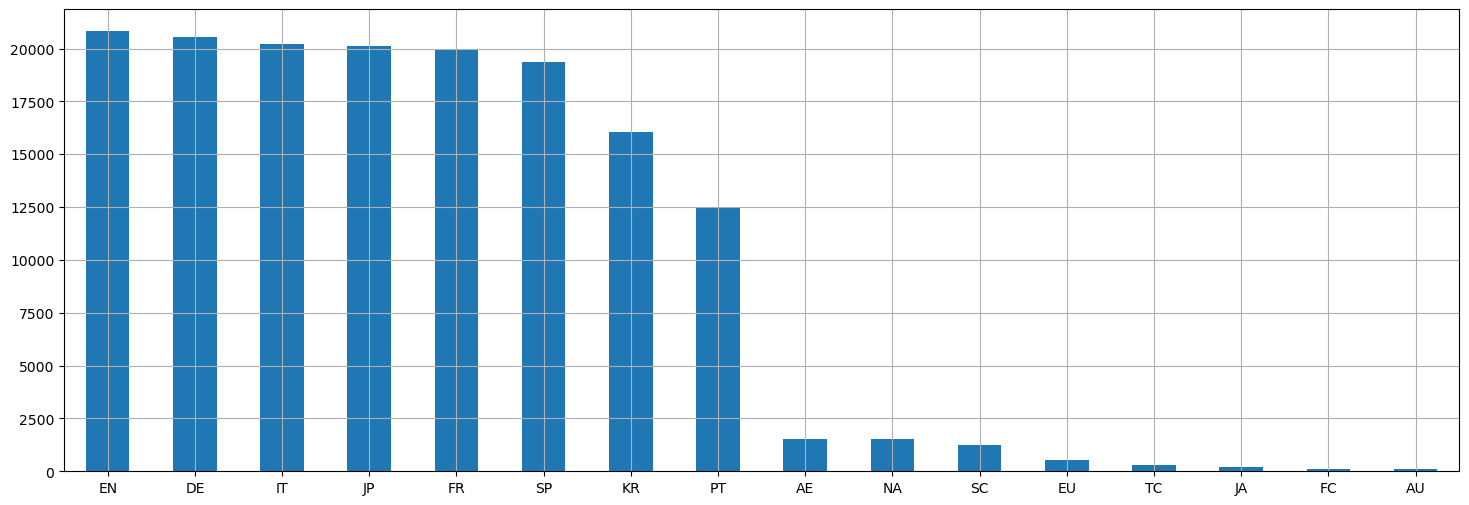

In [15]:
all_set_lists_df['Region'].value_counts().plot.bar(figsize = (18,6), grid=True, rot=0)
plt.show()

## Cover card

In [ ]:
print('Total number of cover cards:', all_set_lists_df['Cover card'].explode('Cover card').nunique())

In [ ]:
all_set_lists_df.explode('Cover card').groupby('Cover card').nunique()

In [ ]:
all_set_lists_df['Cover card'].explode().value_counts().plot.barh(figsize = (10,180), grid=True)
plt.show()

## Series

In [ ]:
print('Total number of series:', all_set_lists_df['Series'].nunique())

In [ ]:
all_set_lists_df.groupby('Series').nunique()

In [ ]:
all_set_lists_df['Series'].value_counts().plot.barh(figsize = (10,15), grid=True)
plt.show()

## Set type

In [ ]:
print('Total number of set types:', all_set_lists_df['Set type'].nunique())

In [ ]:
all_set_lists_df.groupby('Set type').nunique()

In [ ]:
set_info_df['Set type'].value_counts().plot.barh(figsize = (10,10), grid=True)
plt.show()

## Release

In [ ]:
print('Total number of release dates:', all_set_lists_df['Release'].nunique())

In [ ]:
all_set_lists_df.groupby('Release', dropna=False).nunique()

In [ ]:
set_by_release = pd.DataFrame(all_set_lists_df.groupby('Release', dropna=False)['Set'].nunique())

### By year

In [ ]:
all_set_lists_df.drop('Modification date', axis=1).groupby('Release', dropna=False).nunique().groupby(set_by_release.index.strftime('%Y')).sum()

In [ ]:
rate_plot(set_by_release)

### By month

In [ ]:
set_by_release.groupby(set_by_release.index.strftime('%B')).sum().sort_index(key=lambda x: pd.to_datetime(x, format='%B').month).plot.bar(figsize= (16,8), grid=True, xlabel = 'Release month', rot = 0)
plt.show()

In [ ]:
set_by_release.groupby(set_by_release.index.strftime('%d')).sum().plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the month', rot = 0)
plt.show()

### By day

In [ ]:
set_by_release.groupby(set_by_release.index.dayofyear).sum().plot(figsize= (16,8), grid=True, xlabel = 'Release day of the year')
plt.show()

In [ ]:
set_by_release_wd = set_by_release.groupby(set_by_release.index.weekday).sum()
set_by_release_wd.index = [calendar.day_name[i] for i in set_by_release_wd.index.astype(int)]
set_by_release_wd.plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the week', rot = 0)
plt.show()

### By region

In [ ]:
by_release_region = all_set_lists_df.groupby(['Region','Release']).nunique()
by_release_region

In [ ]:
set_by_release_region = by_release_region['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_region_y = set_by_release_region.groupby(set_by_release_region.index.strftime('%Y')).sum().T
set_by_release_region_y

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(set_by_release_region_y[set_by_release_region_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_region, title='Set releases')

### By series

In [ ]:
by_release_series = all_set_lists_df.explode('Series').groupby(['Series','Release']).nunique()
by_release_series

In [ ]:
set_by_release_series = by_release_series['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_series_y = set_by_release_series.groupby(set_by_release_series.index.strftime('%Y')).sum().T
set_by_release_series_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_series_y[set_by_release_series_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_series, title='Set releases')

### By set type

In [ ]:
by_release_type = all_set_lists_df.explode('Set type').groupby(['Set type','Release']).nunique()
by_release_type

In [ ]:
set_by_release_type = by_release_type['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_type_y = set_by_release_type.groupby(set_by_release_type.index.strftime('%Y')).sum().T
set_by_release_type_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_type_y[set_by_release_type_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_type, title='Set releases')

# Debug

This section is used for debugging the extraction of data from MediaWiki query responses

## Has nan name/number

In [16]:
all_set_lists_df[all_set_lists_df['Name'].isna() | all_set_lists_df['Card number'].isna()]

,Set,Card number,Name,Rarity,Print,Quantity,Region,Release,Series,Set type,Cover card,Page URL,Modification date,_merge
6632,Legendary Decks II,<NA>,<NA>,"(Common,)",<NA>,<NA>,IT,2016-10-06,<NA>,Collector's Set,NaN,https://yugipedia.com/wiki/Legendary_Decks_II,2022-01-18 14:06:23,both
6677,Legendary Decks II,<NA>,<NA>,"(Common,)",<NA>,<NA>,IT,2016-10-06,<NA>,Collector's Set,NaN,https://yugipedia.com/wiki/Legendary_Decks_II,2022-01-18 14:06:23,both
6722,Legendary Decks II,<NA>,<NA>,"(Common,)",<NA>,<NA>,IT,2016-10-06,<NA>,Collector's Set,NaN,https://yugipedia.com/wiki/Legendary_Decks_II,2022-01-18 14:06:23,both
6770,Legendary Decks II,<NA>,<NA>,"(Common,)",<NA>,<NA>,PT,2016-10-07,<NA>,Collector's Set,NaN,https://yugipedia.com/wiki/Legendary_Decks_II,2022-01-18 14:06:23,both
6815,Legendary Decks II,<NA>,<NA>,"(Common,)",<NA>,<NA>,PT,2016-10-07,<NA>,Collector's Set,NaN,https://yugipedia.com/wiki/Legendary_Decks_II,2022-01-18 14:06:23,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143962,EX Starter Box,<NA>,Reverse Trap,"(Common,)",Reprint,1,JP,1999-12-16,<NA>,Starter Deck,"(Blue-Eyes White Dragon,)",https://yugipedia.com/wiki/EX_Starter_Box,2022-05-01 06:51:59,both
143963,EX Starter Box,<NA>,Remove Trap,"(Common,)",Reprint,1,JP,1999-12-16,<NA>,Starter Deck,"(Blue-Eyes White Dragon,)",https://yugipedia.com/wiki/EX_Starter_Box,2022-05-01 06:51:59,both
143964,EX Starter Box,<NA>,De-Spell,"(Common,)",Reprint,2,JP,1999-12-16,<NA>,Starter Deck,"(Blue-Eyes White Dragon,)",https://yugipedia.com/wiki/EX_Starter_Box,2022-05-01 06:51:59,both
143965,EX Starter Box,<NA>,Castle Walls,"(Common,)",Reprint,1,JP,1999-12-16,<NA>,Starter Deck,"(Blue-Eyes White Dragon,)",https://yugipedia.com/wiki/EX_Starter_Box,2022-05-01 06:51:59,both


## Has nan rarity

In [17]:
all_set_lists_df.explode('Rarity')[all_set_lists_df.explode('Rarity')['Rarity'].isna()]['Set'].unique()

array(['Dark Beginning 2', 'Dark Revelation Volume 2',
       'Advanced Tournament Pack 2016 Vol.1',
       'Advanced Tournament Pack 2013 Vol.4',
       'The Valuable Book character cards', 'Dark Beginning 1',
       'Advanced Event Pack 2013 Vol.2', 'V Jump April 2013 Tokens',
       'Dark Revelation Volume 1', 'Advanced Tournament Pack 2013 Vol.3',
       'Advanced Event Pack 2014 Vol.1', 'Classic Pack 03',
       'Deck Build Pack: Wild Survivors', 'Duelist Nexus'], dtype=object)

## Has nan release

In [18]:
all_set_lists_df[all_set_lists_df['Release'].isna()]['Set'].unique()

array(['Astral Pack Two',
       'Invasion: Vengeance Sneak Peek Participation Card',
       'Raging Battle Sneak Peek Participation Card',
       'Sneak Peek Participation Cards',
       'Yu-Gi-Oh! Power of Chaos: Kaiba the Revenge promotional cards',
       'Dimension of Chaos Sneak Peek Participation Card',
       'Millennium Pack', 'Shonen Jump Vol. 10, Issue 1 promotional card',
       "Yu-Gi-Oh! 5D's World Championship 2011: Over the Nexus promotional cards",
       'Hobby League 7 participation card D',
       'Shadow Specters Sneak Peek Participation Card',
       'The Valuable Book promotional cards',
       "Yu-Gi-Oh! 5D's Volume 1 promotional card",
       'Structure Deck: Machine Re-Volt Special Edition',
       'Shonen Jump Vol. 7, Issue 6 promotional card',
       'Hobby League 6 participation card E',
       'Shonen Jump Vol. 4, Issue 11 promotional card',
       'Legacy of the Valiant Sneak Peek Participation Card',
       'Secrets of Eternity Sneak Peek Participation C

## Merge failed

In [6]:
all_set_lists_df[all_set_lists_df['_merge']=='right_only']

,Set,Card number,Name,Rarity,Print,Quantity,Region,Release,Series,Set type,Cover card,Page URL,Modification date,_merge


In [10]:
all_set_lists_df[all_set_lists_df['_merge']=='left_only']

,Set,Card number,Name,Rarity,Print,Quantity,Region,Release,Series,Set type,Cover card,Page URL,Modification date,_merge
63351,Structure Deck: Dinosaur's Rage Special Edition,SD09-JPS01,Super Conductor Tyranno,"(Ultimate Rare,)",<NA>,<NA>,JP,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only
63352,Structure Deck: Dinosaur's Rage Special Edition,SD09-KRSE1,Hidden Armory,"(Secret rare,)",<NA>,<NA>,KR,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only
81626,The Valuable Book character cards,<NA>,Joey,None,<NA>,<NA>,JP,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only
81627,The Valuable Book character cards,<NA>,Kaiba,None,<NA>,<NA>,JP,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only
81628,The Valuable Book character cards,<NA>,Yugi,None,<NA>,<NA>,JP,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only
81629,The Valuable Book character cards,<NA>,Pegasus,None,<NA>,<NA>,JP,NaT,<NA>,<NA>,NaN,<NA>,NaT,left_only


 # Epilogue

In [ ]:
footer()

## HTML export

In [ ]:
# May need to sleep for a few seconds after saving
save_notebook()

In [ ]:
! jupyter nbconvert Sets.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Ss]ets[._]*"

In [ ]:
! git commit -m {"'Sets update-" + timestamp.isoformat() + "'"}